In [2]:
!pip install tensorflow-datasets

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 105.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 112.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.6/167.6 kB 274.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.9/152.9 kB 132.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 kB 148.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.5/294.5 kB 328.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 356.2 MB/s eta 0:00:00
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21483 sha256=adae860446d6726958601c56a9c250d6df30bc81d56cfdf5af3f6c6a48fac600
  Stored in directory: /tmp/pip-ephem-wheel-cache-uxa18j_t/wheels/90/74/b1/9b54c896b8d9409e9268329d4d45ede8a8040abe91c8879932
Successfully built promise


In [1]:
!pip uninstall -y tensorflow


Found existing installation: tensorflow 2.12.0
Uninstalling tensorflow-2.12.0:
  Successfully uninstalled tensorflow-2.12.0


In [2]:
pip install tensorflow==2.15.1

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 61.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 111.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 113.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 103.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 145.0 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml_dtypes 0.5.1
    Uninstalling ml_dtypes-0.5.1:
      Successfully uninstalled ml_dtypes-0.5.1
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled

시드 고정 완료.
클래스 수: 5
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 tf.__operators__.getitem_1  (None, 180, 180, 3)       0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_1 (TFOpLamb  (None, 180, 180, 3)       0         
 da)                                                             
                                                                 
 vgg16 (Functional)          (None, 5, 5, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 12800)             0         
                                                                 
 dense_2 (Dense)             (None, 256)

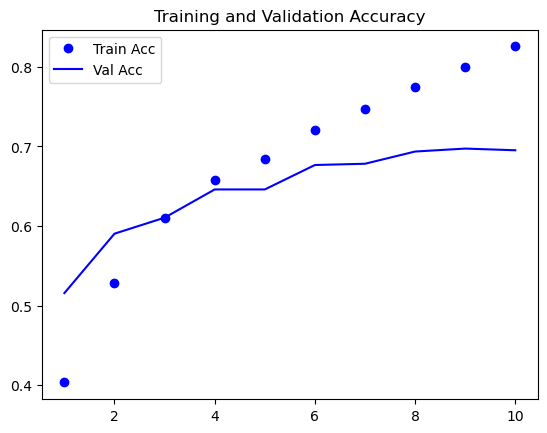

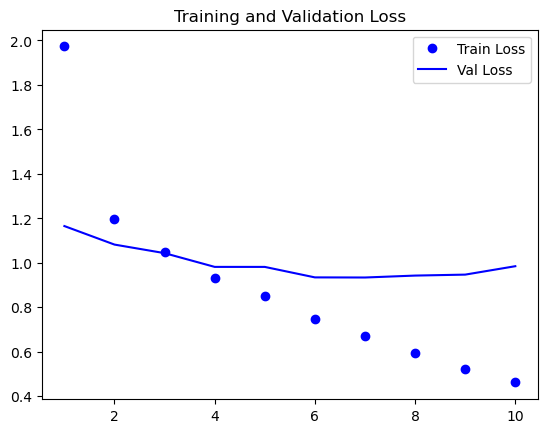

1/1 [==============================] - 0s 12ms/step
              precision    recall  f1-score   support

           0       0.38      0.05      0.09       155
           1       0.55      0.83      0.66       481
           2       0.65      0.26      0.38       258
           3       0.78      0.91      0.84       886
           4       0.00      0.00      0.00       105

    accuracy                           0.68      1885
   macro avg       0.47      0.41      0.39      1885
weighted avg       0.63      0.68      0.62      1885



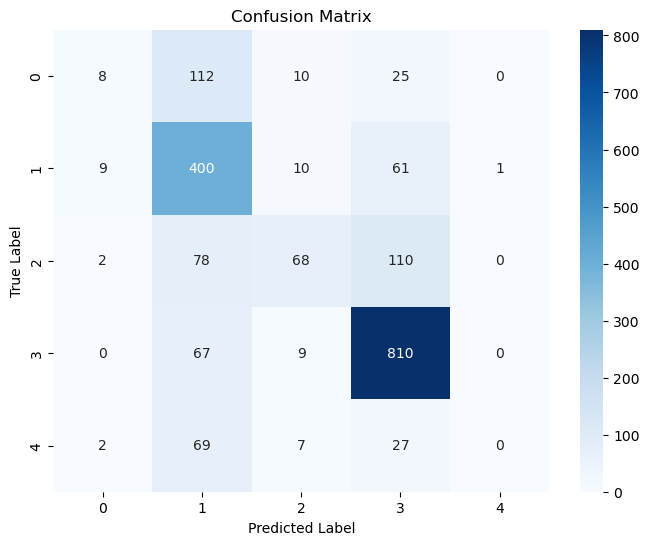

1/1 [==============================] - 0s 12ms/step


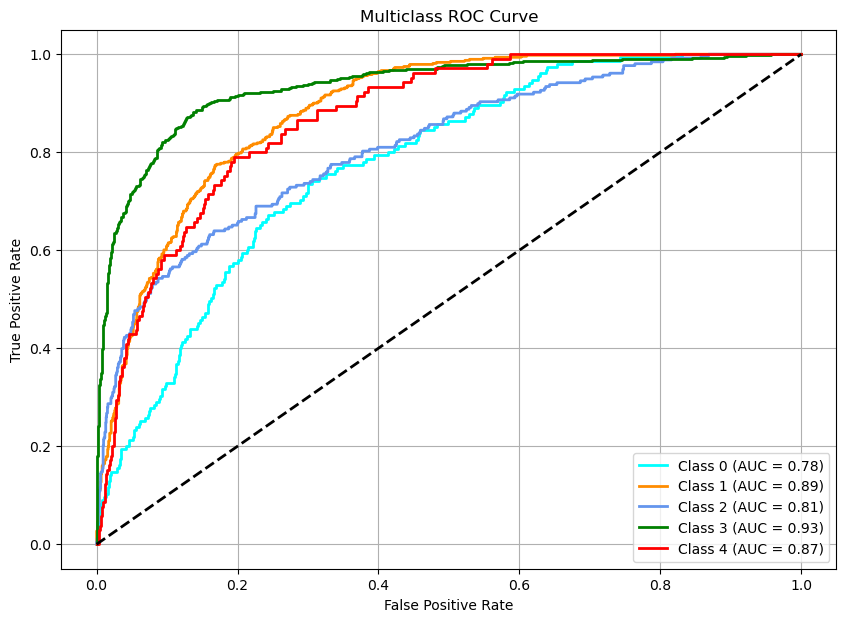

In [4]:
# data augmentation 미적용 , 에폭이 30 이상일 경우 early stopping 포함, 
# 에폭 : 10, , dropout_rate: 0.5 , batch size : 16 , data augmentation 미적용 , early stopping 미포함, 
# ================================
# 1. 라이브러리 및 시드 설정
# ================================
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# 시드 고정 함수
def set_seed(seed=123):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    print("시드 고정 완료.")

set_seed(123)

# ================================
# 2. 하이퍼파라미터 설정
# ================================
IMG_SIZE = 180
BATCH_SIZE = 16      # 🔧 수정 가능
EPOCHS = 10           # 🔧 30 이상이면 EarlyStopping 적용됨
LEARNING_RATE = 1e-5
DENSE_UNITS = 256
DROPOUT_RATE = 0.5

# ================================
# 3. 데이터셋 로딩 및 전처리
# ================================
(raw_train, raw_val, raw_test), info = tfds.load(
    'cassava',
    split=['train', 'validation', 'test'],
    as_supervised=True,
    with_info=True
)

num_classes = info.features['label'].num_classes
print("클래스 수:", num_classes)

def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

train_ds = raw_train.map(preprocess).shuffle(1000).batch(BATCH_SIZE).prefetch(1)
val_ds = raw_val.map(preprocess).batch(BATCH_SIZE).prefetch(1)
test_ds = raw_test.map(preprocess).batch(BATCH_SIZE).prefetch(1)

# ================================
# 4. 모델 구성 (Data Augmentation ❌)
# ================================
conv_base = keras.applications.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)

conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = keras.applications.vgg16.preprocess_input(inputs)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(DENSE_UNITS, activation='relu')(x)
x = layers.Dropout(DROPOUT_RATE)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

model = keras.Model(inputs, outputs)

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.RMSprop(learning_rate=LEARNING_RATE),
    metrics=["accuracy"]
)

model.summary()

# ================================
# 5. 학습 (조건부 EarlyStopping 포함)
# ================================
callbacks = [
    keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True, monitor="val_loss")
]

if EPOCHS >= 30:
    print(f"✅ 에폭이 {EPOCHS}이므로 EarlyStopping을 진행합니다.")
    callbacks.append(
        keras.callbacks.EarlyStopping(
            monitor="val_loss",
            patience=7, # 기존 5 → 7로 변경하여 성능 저하를 한두 번은 허용
            restore_best_weights=True
        )
    )
else:
    print(f"⚠️ 에폭이 {EPOCHS}이하이므로 EarlyStopping을 진행하지 않습니다.")

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=callbacks
)

# ================================
# 6. 평가
# ================================
import time 
model = keras.models.load_model("best_model.h5")

start_time = time.time()
test_loss, test_acc = model.evaluate(test_ds)
end_time = time.time()

print(f"테스트 정확도: {test_acc:.3f}")
print(f"✅ 테스트 평가 소요 시간: {end_time - start_time:.2f}초")
# ================================
# 7. 학습 곡선 시각화
# ================================
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(acc) + 1)

plt.plot(epochs_range, acc, 'bo', label='Train Acc')
plt.plot(epochs_range, val_acc, 'b', label='Val Acc')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Train Loss')
plt.plot(epochs_range, val_loss, 'b', label='Val Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# ================================
# 8. Confusion Matrix & Report
# ================================
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

print(classification_report(y_true, y_pred))
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

#-------------------------------- ROC 커브 추가

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# 클래스 수에 맞게 이진화
y_true_bin = label_binarize(y_true, classes=list(range(num_classes)))
y_score = []

# 예측 확률 수집
for images, _ in test_ds:
    preds = model.predict(images)
    y_score.extend(preds)

y_score = np.array(y_score)

# ROC Curve 계산
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 마이크로 평균 ROC
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot
plt.figure(figsize=(10, 7))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red'])

for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


시드 고정 완료.
클래스 수: 5
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 tf.__operators__.getitem_4  (None, 180, 180, 3)       0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_4 (TFOpLamb  (None, 180, 180, 3)       0         
 da)                                                             
                                                                 
 vgg16 (Functional)          (None, 5, 5, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 12800)             0         
                                                                 
 dense_8 (Dense)             (None, 256)

/opt/conda/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


177/177 [==============================] - 11s 57ms/step - loss: 2.4310 - accuracy: 0.3840 - val_loss: 1.3090 - val_accuracy: 0.4960
Epoch 2/30
177/177 [==============================] - 9s 51ms/step - loss: 1.3511 - accuracy: 0.4682 - val_loss: 1.2001 - val_accuracy: 0.5114
Epoch 3/30
177/177 [==============================] - 9s 51ms/step - loss: 1.2047 - accuracy: 0.5230 - val_loss: 1.1385 - val_accuracy: 0.5442
Epoch 4/30
177/177 [==============================] - 9s 51ms/step - loss: 1.0940 - accuracy: 0.5861 - val_loss: 1.0756 - val_accuracy: 0.5966
Epoch 5/30
177/177 [==============================] - 9s 51ms/step - loss: 1.0077 - accuracy: 0.6149 - val_loss: 1.0379 - val_accuracy: 0.6178
Epoch 6/30
177/177 [==============================] - 9s 51ms/step - loss: 0.9120 - accuracy: 0.6597 - val_loss: 1.0125 - val_accuracy: 0.6321
Epoch 7/30
177/177 [==============================] - 9s 51ms/step - loss: 0.8305 - accuracy: 0.6899 - val_loss: 0.9992 - val_accuracy: 0.6411
Epoch 8/3

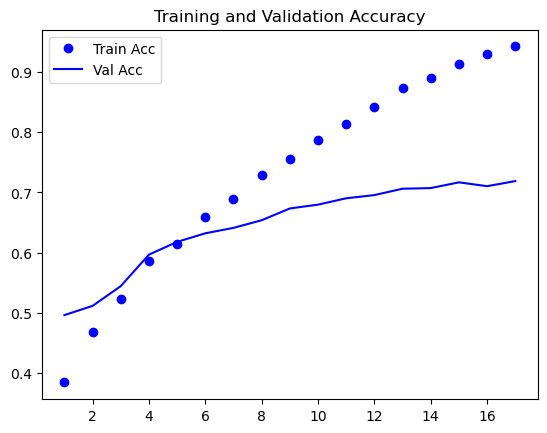

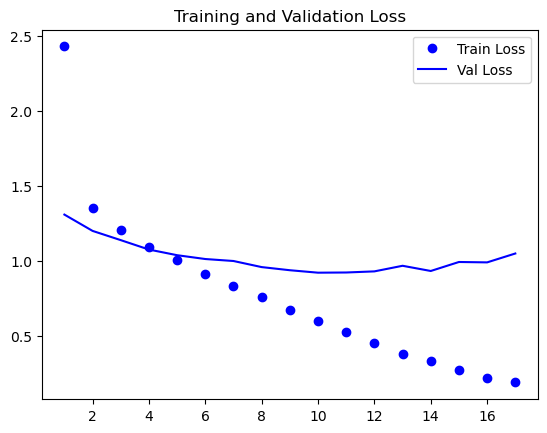

1/1 [==============================] - 0s 66ms/step
              precision    recall  f1-score   support

           0       0.33      0.13      0.19       155
           1       0.61      0.71      0.66       481
           2       0.58      0.53      0.56       258
           3       0.79      0.89      0.83       886
           4       0.58      0.10      0.18       105

    accuracy                           0.69      1885
   macro avg       0.58      0.47      0.48      1885
weighted avg       0.66      0.69      0.66      1885



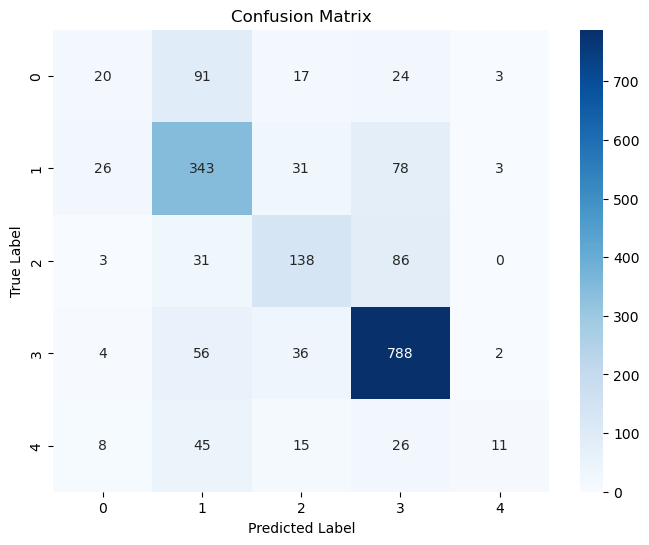

1/1 [==============================] - 0s 15ms/step


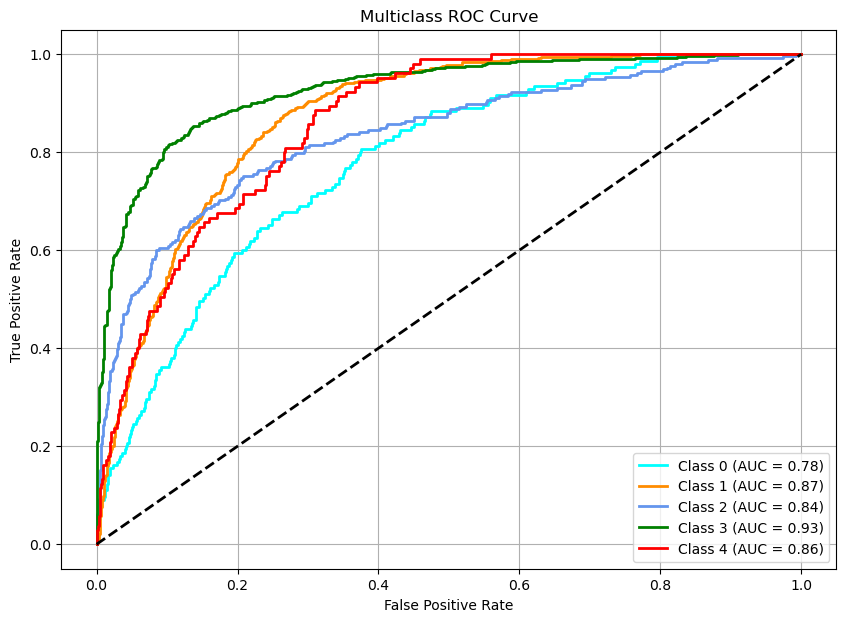

In [7]:
# data augmentation 적용 , 에폭이 30 이상일 경우 early stopping 포함, 
# 에폭 : 10, , dropout_rate: 0.5 , batch size : 16 , data augmentation 적용 , early stopping 미포함, 
# 에폭 : 30, dropout_rate: 0.4, batch size: 32, # data augmentation 적용 , early stopping 포함,  (에폭을 30으로 증가시켰으므로)

# data augmentation 적용 + 성능 개선 요소 반영 (early stopping 포함 조건)

# ✅ 개선 사항 (data augmentation 미적용) 대비 주요 변경점 정리

# 1. data augmentati) 적용
#   - tf.keras.Sequential을 활용해 무작위 수평 뒤집기, 회전, 줌 등을 적용함

# 2. optimizer 변경
#   - RMSprop → Adam으로 변경 (일반적으로 더 안정적이고 빠른 수렴)

# 3. Dropout rate 조정
#   - Dropout 비율을 0.4로 조정해 과적합 방지 및 regularization 개선

# 4. class_weight 적용
#   - 클래스 불균형을 완화하기 위해 각 클래스의 샘플 수에 따라 가중치 적용

# 5. Label Smoothing 적용 ## 진행 하려고 하였으나, 버전 업그레이드 시 학습속도가 너무 오래 걸려 생략
#   - loss 함수에서 label smoothing 파라미터 0.1을 적용해 모델 일반화 성능 향상

# 6. 학습 데이터에만 증강 적용
#   - validation/test는 증강하지 않도록 분리된 preprocessing 파이프라인 유지

# ================================
# 1. 라이브러리 및 시드 설정
# ================================
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from collections import Counter

# 시드 고정 함수
def set_seed(seed=123):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    print("시드 고정 완료.")

set_seed(123)

# ================================
# 2. 하이퍼파라미터 설정
# ================================
IMG_SIZE = 180
BATCH_SIZE = 32
EPOCHS = 30           # 🔧 30 이상이면 EarlyStopping 적용
LEARNING_RATE = 1e-5
DENSE_UNITS = 256
DROPOUT_RATE = 0.4
USE_DATA_AUGMENTATION = True

# ================================
# 3. 데이터셋 로딩 및 전처리
# ================================
(raw_train, raw_val, raw_test), info = tfds.load(
    'cassava',
    split=['train', 'validation', 'test'],
    as_supervised=True,
    with_info=True
)

num_classes = info.features['label'].num_classes
print("클래스 수:", num_classes)

def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    if USE_DATA_AUGMENTATION:
        image = tf.image.random_flip_left_right(image)
        image = tf.image.random_brightness(image, max_delta=0.1)
        image = tf.image.random_contrast(image, 0.9, 1.1)
        image = tf.image.random_saturation(image, 0.9, 1.1)
    return image, label

train_ds = raw_train.map(preprocess).shuffle(1000).batch(BATCH_SIZE).prefetch(1)
val_ds = raw_val.map(preprocess).batch(BATCH_SIZE).prefetch(1)
test_ds = raw_test.map(preprocess).batch(BATCH_SIZE).prefetch(1)

# ================================
# 4. 클래스 가중치 계산
# ================================
def compute_class_weights(ds):
    labels = []
    for _, label in ds:   # ✅ 여기 unbatch() 제거
        labels.append(int(label.numpy()))
    counter = Counter(labels)
    total = sum(counter.values())
    return {i: total / (len(counter) * c) for i, c in counter.items()}

class_weight = compute_class_weights(raw_train)

# ================================
# 5. 모델 구성
# ================================
conv_base = keras.applications.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)

conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = keras.applications.vgg16.preprocess_input(inputs)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(DENSE_UNITS, activation='relu')(x)
x = layers.Dropout(DROPOUT_RATE)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

model = keras.Model(inputs, outputs)

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    metrics=["accuracy"]
)

model.summary()

# ================================
# 6. 학습 (EarlyStopping 조건 적용)
# ================================
callbacks = [
    keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True, monitor="val_loss")
]

if EPOCHS >= 30:
    print(f"✅ 에폭이 {EPOCHS}이므로 EarlyStopping을 진행합니다.")
    callbacks.append(
        keras.callbacks.EarlyStopping(
            monitor="val_loss",
            patience=7, # 기존 5 → 7로 변경하여 성능 저하를 한두 번은 허용
            restore_best_weights=True
        )
    )
else:
    print(f"⚠️ 에폭이 {EPOCHS}이하이므로 EarlyStopping을 진행하지 않습니다.")

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=callbacks
)
# ================================
# 7. 테스트 포토리얼 포트
# ================================
import time

model = keras.models.load_model("best_model.h5")

start_time = time.time()
test_loss, test_acc = model.evaluate(test_ds)
end_time = time.time()

print(f"테스트 정확도: {test_acc:.3f}")
print(f"✅ 테스트 평가 소요 시간: {end_time - start_time:.2f}초")
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(acc) + 1)

plt.plot(epochs_range, acc, 'bo', label='Train Acc')
plt.plot(epochs_range, val_acc, 'b', label='Val Acc')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Train Loss')
plt.plot(epochs_range, val_loss, 'b', label='Val Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# ================================
# 8. Confusion Matrix & Report
# ================================
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

print(classification_report(y_true, y_pred))
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


#-------------------------------- ROC 커브 추가

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# 클래스 수에 맞게 이진화
y_true_bin = label_binarize(y_true, classes=list(range(num_classes)))
y_score = []

# 예측 확률 수집
for images, _ in test_ds:
    preds = model.predict(images)
    y_score.extend(preds)

y_score = np.array(y_score)

# ROC Curve 계산
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 마이크로 평균 ROC
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot
plt.figure(figsize=(10, 7))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red'])

for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
#-------------------------------------------------------------------------------------여기까지가 cassava

시드 고정 완료.
클래스 수: 8
Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 tf.__operators__.getitem_8  (None, 180, 180, 3)       0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_8 (TFOpLamb  (None, 180, 180, 3)       0         
 da)                                                             
                                                                 
 vgg16 (Functional)          (None, 5, 5, 512)         14714688  
                                                                 
 flatten_8 (Flatten)         (None, 12800)             0         
                                                                 
 dense_16 (Dense)            (None, 256)

/opt/conda/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


219/219 [==============================] - 7s 29ms/step - loss: 3.3192 - accuracy: 0.3120 - val_loss: 1.3459 - val_accuracy: 0.5080
Epoch 2/10
219/219 [==============================] - 6s 27ms/step - loss: 1.3277 - accuracy: 0.5189 - val_loss: 1.0239 - val_accuracy: 0.6227
Epoch 3/10
219/219 [==============================] - 6s 27ms/step - loss: 0.9805 - accuracy: 0.6491 - val_loss: 0.7414 - val_accuracy: 0.7413
Epoch 4/10
219/219 [==============================] - 6s 27ms/step - loss: 0.6936 - accuracy: 0.7543 - val_loss: 0.5956 - val_accuracy: 0.7987
Epoch 5/10
219/219 [==============================] - 6s 28ms/step - loss: 0.5191 - accuracy: 0.8157 - val_loss: 0.4950 - val_accuracy: 0.8373
Epoch 6/10
219/219 [==============================] - 6s 27ms/step - loss: 0.3745 - accuracy: 0.8754 - val_loss: 0.4762 - val_accuracy: 0.8467
Epoch 7/10
219/219 [==============================] - 6s 27ms/step - loss: 0.2887 - accuracy: 0.8989 - val_loss: 0.4611 - val_accuracy: 0.8547
Epoch 8/10

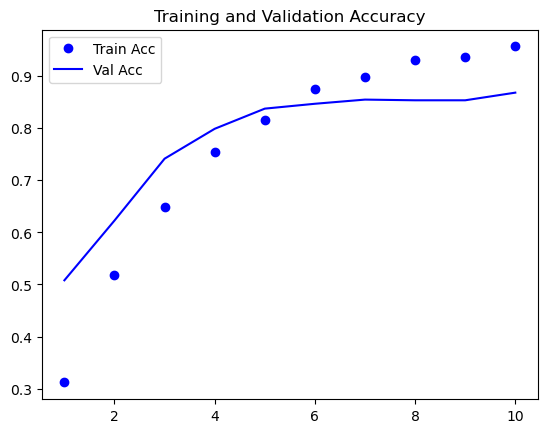

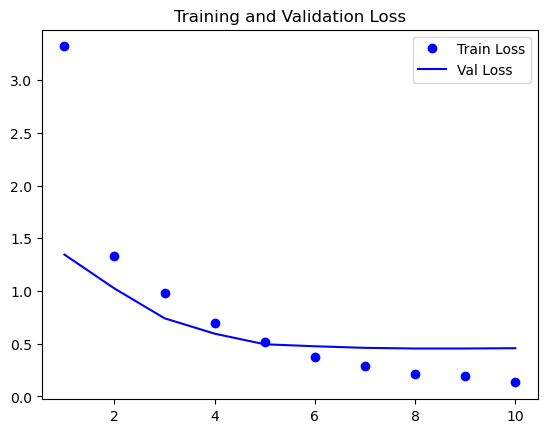

1/1 [==============================] - 0s 13ms/step
              precision    recall  f1-score   support

           0       0.88      0.78      0.83        88
           1       0.76      0.80      0.78        87
           2       0.78      0.74      0.76       108
           3       0.91      0.93      0.92        92
           4       0.88      0.90      0.89        98
           5       0.89      0.93      0.91        87
           6       0.97      0.98      0.97        93
           7       0.97      0.99      0.98        97

    accuracy                           0.88       750
   macro avg       0.88      0.88      0.88       750
weighted avg       0.88      0.88      0.88       750



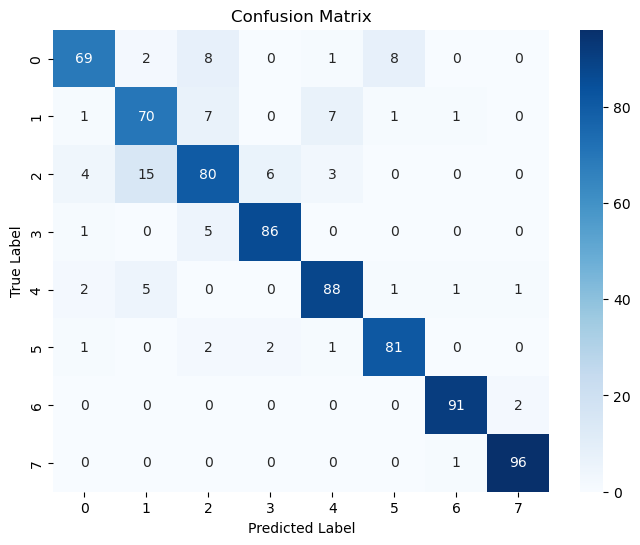

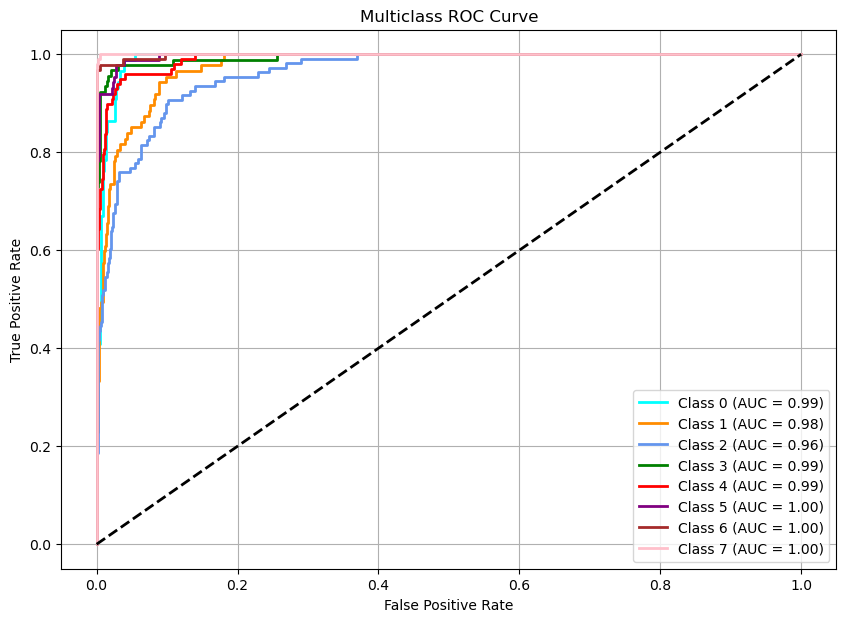

In [11]:
# data augmentation 미적용 , 에폭이 30 이상일 경우 early stopping 포함, 
# 에폭 : 10, , dropout_rate: 0.5 , batch size : 16 , data augmentation 미적용 , early stopping 미포함, 
# 에폭 : 30, dropout_rate: 0.5, batch size: 32, # data augmentation 미적용 , early stopping 포함,  (에폭을 30으로 증가시켰으므로)

# ================================
# 1. 라이브러리 및 시드 설정
# ================================
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import seaborn as sns

def set_seed(seed=123):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    print("시드 고정 완료.")

set_seed(123)

# ================================
# 2. 하이퍼파라미터 설정
# ================================
IMG_SIZE = 180
BATCH_SIZE = 16
EPOCHS = 10
LEARNING_RATE = 1e-5
DENSE_UNITS = 256
DROPOUT_RATE = 0.5

# ================================
# 3. 데이터셋 로딩 및 전처리
# ================================
(raw_train, raw_val, raw_test), info = tfds.load(
    'colorectal_histology',
    split=['train[:70%]', 'train[70%:85%]', 'train[85%:]'],
    as_supervised=True,
    with_info=True
)

num_classes = info.features['label'].num_classes
print("클래스 수:", num_classes)

def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

train_ds = raw_train.map(preprocess).shuffle(1000).batch(BATCH_SIZE).prefetch(1)
val_ds = raw_val.map(preprocess).batch(BATCH_SIZE).prefetch(1)
test_ds = raw_test.map(preprocess).batch(BATCH_SIZE).prefetch(1)

# ================================
# 4. 모델 구성 (VGG16)
# ================================
conv_base = keras.applications.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)

conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = keras.applications.vgg16.preprocess_input(inputs)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(DENSE_UNITS, activation='relu')(x)
x = layers.Dropout(DROPOUT_RATE)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

model = keras.Model(inputs, outputs)
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.RMSprop(learning_rate=LEARNING_RATE),
    metrics=["accuracy"]
)

model.summary()

# ================================
# 5. 학습 (EarlyStopping 포함 조건)
# ================================
callbacks = [
    keras.callbacks.ModelCheckpoint("best_model_colorectal.h5", save_best_only=True, monitor="val_loss")
]

if EPOCHS >= 30:
    print(f"✅ 에폭이 {EPOCHS}이므로 EarlyStopping을 진행합니다.")
    callbacks.append(
        keras.callbacks.EarlyStopping(
            monitor="val_loss",
            patience=7, # 기존 5 → 7로 변경하여 성능 저하를 한두 번은 허용
            restore_best_weights=True
        )
    )
else:
    print(f"⚠️ 에폭이 {EPOCHS}이하이므로 EarlyStopping을 진행하지 않습니다.")

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=callbacks
)

# ================================
# 6. 평가
# ================================
import time

model = keras.models.load_model("best_model_colorectal.h5")

start_time = time.time()
test_loss, test_acc = model.evaluate(test_ds)
end_time = time.time()

print(f"테스트 정확도: {test_acc:.3f}")
print(f"✅ 평가 소요 시간: {end_time - start_time:.2f}초")
# ================================
# 7. 학습 곡선 시각화
# ================================
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(acc) + 1)

plt.plot(epochs_range, acc, 'bo', label='Train Acc')
plt.plot(epochs_range, val_acc, 'b', label='Val Acc')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Train Loss')
plt.plot(epochs_range, val_loss, 'b', label='Val Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# ================================
# 8. Confusion Matrix & Report
# ================================
y_true = []
y_pred = []
y_score = []

for images, labels in test_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))
    y_score.extend(preds)

print(classification_report(y_true, y_pred))
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# ================================
# 9. ROC Curve (Multiclass)
# ================================
y_true_bin = label_binarize(y_true, classes=list(range(num_classes)))
y_score = np.array(y_score)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure(figsize=(10, 7))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown', 'pink'])

for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()



시드 고정 완료.
클래스 수: 8
Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_26 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 tf.__operators__.getitem_1  (None, 180, 180, 3)       0         
 2 (SlicingOpLambda)                                             
                                                                 
 tf.nn.bias_add_12 (TFOpLam  (None, 180, 180, 3)       0         
 bda)                                                            
                                                                 
 vgg16 (Functional)          (None, 5, 5, 512)         14714688  
                                                                 
 flatten_12 (Flatten)        (None, 12800)             0         
                                                                 
 dense_24 (Dense)            (None, 256

/opt/conda/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


110/110 [==============================] - 7s 52ms/step - loss: 4.1869 - accuracy: 0.2889 - val_loss: 1.5988 - val_accuracy: 0.4453
Epoch 2/30
110/110 [==============================] - 6s 48ms/step - loss: 1.6591 - accuracy: 0.4477 - val_loss: 1.2567 - val_accuracy: 0.5360
Epoch 3/30
110/110 [==============================] - 6s 47ms/step - loss: 1.2752 - accuracy: 0.5543 - val_loss: 1.0423 - val_accuracy: 0.6320
Epoch 4/30
110/110 [==============================] - 5s 46ms/step - loss: 0.9688 - accuracy: 0.6597 - val_loss: 0.8403 - val_accuracy: 0.7027
Epoch 5/30
110/110 [==============================] - 6s 49ms/step - loss: 0.7632 - accuracy: 0.7306 - val_loss: 0.6955 - val_accuracy: 0.7600
Epoch 6/30
110/110 [==============================] - 5s 46ms/step - loss: 0.5867 - accuracy: 0.8006 - val_loss: 0.6101 - val_accuracy: 0.7893
Epoch 7/30
110/110 [==============================] - 6s 48ms/step - loss: 0.4693 - accuracy: 0.8409 - val_loss: 0.5699 - val_accuracy: 0.8080
Epoch 8/30

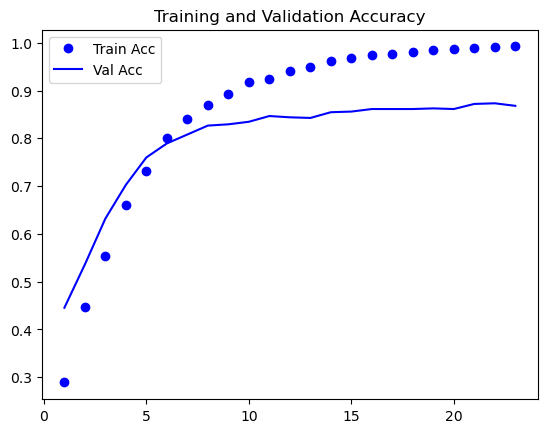

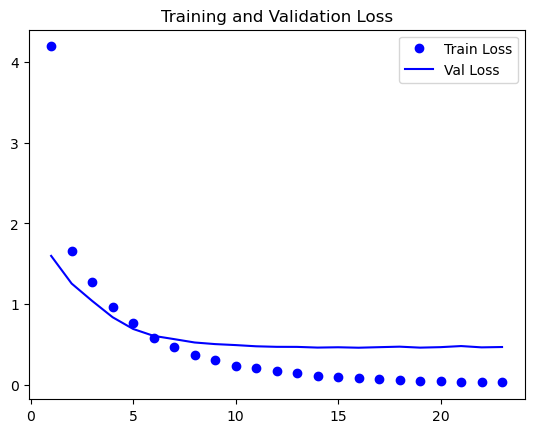

1/1 [==============================] - 0s 66ms/step
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        88
           1       0.69      0.74      0.71        87
           2       0.77      0.64      0.70       108
           3       0.91      0.91      0.91        92
           4       0.83      0.93      0.88        98
           5       0.98      0.92      0.95        87
           6       0.95      0.97      0.96        93
           7       0.98      0.99      0.98        97

    accuracy                           0.87       750
   macro avg       0.87      0.87      0.87       750
weighted avg       0.87      0.87      0.87       750



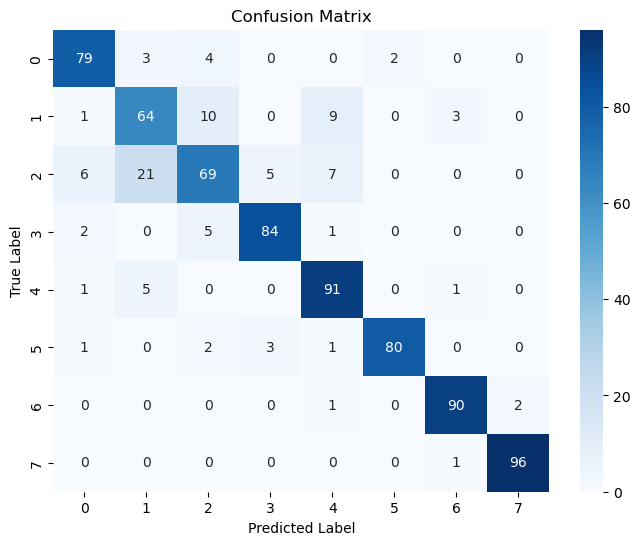

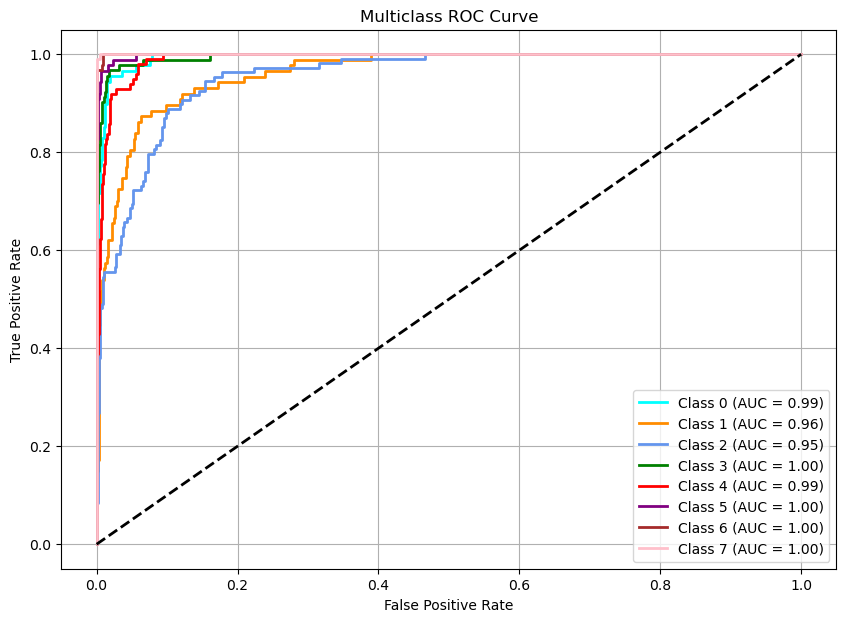

In [15]:
# data augmentation 미적용 , 에폭이 30 이상일 경우 early stopping 포함, 
# 에폭 : 10, , dropout_rate: 0.5 , batch size : 16 , data augmentation 미적용 , early stopping 미포함, 
# 에폭 : 30, dropout_rate: 0.5, batch size: 32, # data augmentation 미적용 , early stopping 포함,  (에폭을 30으로 증가시켰으므로)

# ================================
# 1. 라이브러리 및 시드 설정
# ================================
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import seaborn as sns
from collections import Counter

def set_seed(seed=123):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    print("시드 고정 완료.")

set_seed(123)

# ================================
# 2. 하이퍼파라미터 설정
# ================================
IMG_SIZE = 180
BATCH_SIZE = 32
EPOCHS = 30
LEARNING_RATE = 1e-5
DENSE_UNITS = 256
DROPOUT_RATE = 0.4
USE_DATA_AUGMENTATION = True

# ================================
# 3. 데이터셋 로딩 및 전처리
# ================================
(raw_train, raw_val, raw_test), info = tfds.load(
    'colorectal_histology',
    split=['train[:70%]', 'train[70%:85%]', 'train[85%:]'],
    as_supervised=True,
    with_info=True
)

num_classes = info.features['label'].num_classes
print("클래스 수:", num_classes)

# 데이터 전처리 및 증강 함수
def preprocess(image, label, augment=False):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))  # 모든 이미지를 지정된 크기로 리사이즈
    if augment:
        image = tf.image.random_flip_left_right(image)      # 좌우 반전 (수평 뒤집기)
        image = tf.image.random_brightness(image, max_delta=0.1)  # 밝기 변화 (0.1 범위 내 랜덤)
        image = tf.image.random_contrast(image, 0.9, 1.1)    # 대비 조정 (0.9~1.1 배 사이 랜덤)
        image = tf.image.random_saturation(image, 0.9, 1.1)  # 채도 조정 (0.9~1.1 배 사이 랜덤)
    return image, label

train_ds = raw_train.map(lambda x, y: preprocess(x, y, augment=USE_DATA_AUGMENTATION))
train_ds = train_ds.shuffle(1000).batch(BATCH_SIZE).prefetch(1)
val_ds = raw_val.map(lambda x, y: preprocess(x, y, augment=False)).batch(BATCH_SIZE).prefetch(1)
test_ds = raw_test.map(lambda x, y: preprocess(x, y, augment=False)).batch(BATCH_SIZE).prefetch(1)

# ================================
# 4. 클래스 가중치 계산
# ================================
def compute_class_weights(ds):
    labels = []
    for _, label in ds:
        labels.append(int(label.numpy()))
    counter = Counter(labels)
    total = sum(counter.values())
    return {i: total / (len(counter) * c) for i, c in counter.items()}

class_weight = compute_class_weights(raw_train)

# ================================
# 5. 모델 구성
# ================================
conv_base = keras.applications.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)

conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = keras.applications.vgg16.preprocess_input(inputs)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(DENSE_UNITS, activation='relu')(x)
x = layers.Dropout(DROPOUT_RATE)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

model = keras.Model(inputs, outputs)
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    metrics=["accuracy"]
)

model.summary()

# ================================
# 6. 학습 (EarlyStopping 조건 적용)
# ================================
callbacks = [
    keras.callbacks.ModelCheckpoint("best_model_colorectal_aug.h5", save_best_only=True, monitor="val_loss")
]

if EPOCHS >= 30:
    print(f"✅ 에폭이 {EPOCHS}이므로 EarlyStopping을 진행합니다.")
    callbacks.append(
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=7, restore_best_weights=True)
    )
else:
    print(f"⚠️ 에폭이 {EPOCHS}이하이므로 EarlyStopping을 진행하지 않습니다.")

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=callbacks,
    class_weight=class_weight
)

# ================================
# 7. 평가 및 시각화
# ================================
model = keras.models.load_model("best_model_colorectal_aug.h5")

start_time = time.time()
test_loss, test_acc = model.evaluate(test_ds)
end_time = time.time()

print(f"테스트 정확도: {test_acc:.3f}")
print(f"✅ 평가 소요 시간: {end_time - start_time:.2f}초")

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(acc) + 1)

plt.plot(epochs_range, acc, 'bo', label='Train Acc')
plt.plot(epochs_range, val_acc, 'b', label='Val Acc')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Train Loss')
plt.plot(epochs_range, val_loss, 'b', label='Val Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# ================================
# 8. Confusion Matrix & ROC Curve
# ================================
y_true = []
y_pred = []
y_score = []

for images, labels in test_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))
    y_score.extend(preds)

print(classification_report(y_true, y_pred))
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
y_true_bin = label_binarize(y_true, classes=list(range(num_classes)))
y_score = np.array(y_score)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure(figsize=(10, 7))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown', 'pink'])
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()